In [1]:
import sys
sys.path.insert(0, '../src')

from NN import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

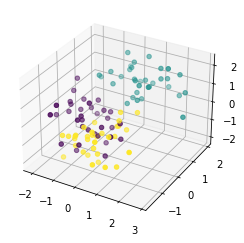

In [2]:
X, y = make_blobs(n_samples=100, n_features=4, centers=((1, 1,1,1), (5, 5,5,5), (3,-1,0,0)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

N = y.size
# one hot encoding
y_oh = np.zeros((N, 3))
y_oh[np.arange(N), y] = 1

In [3]:
X.shape, y.shape, y_oh.shape, type(X), type(y)

((100, 4), (100,), (100, 3), numpy.ndarray, numpy.ndarray)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.30)

In [5]:
y_train.shape, X_train.shape

((70, 3), (70, 4))

In [6]:
test_model = NN(4)
test_model.add(3, 'sigmoid')
test_model.add(3, 'softmax')
print(test_model.layer)

2


In [7]:
test_model.hyper(learning_rate=0.01, epochs=6)
test_model.fit(X_train, y_train, visible=True)

top left weight value is  0.01624345363663242
top left weight value is  -0.010998912673140309
epoch 0. Cost is 30.019987630144897
weight matrix 1 is:
[[ 0.01639934 -0.00624202 -0.00537665 -0.01082084]
 [ 0.00874243 -0.02303191  0.01744424 -0.00761042]
 [ 0.00321378 -0.00269472  0.01443896 -0.02079422]]
derivative of weight matrix 1 is:
[[-0.01558885  0.01244509  0.00949287  0.00911574]
 [-0.00883497  0.00165188  0.00038822 -0.00016474]
 [-0.00233902  0.02010162  0.01821177  0.01928082]]
weight matrix 2 is:
[[-0.03829348 -0.02803942 -0.05783287]
 [ 0.01943632  0.02427347  0.02372266]
 [ 0.01972762  0.01688573  0.01935038]]
derivative of weight matrix 2 is:
[[ 2.72945722  2.63151429  4.90542904]
 [-1.90141855 -1.84453163 -3.4728852 ]
 [-0.82803867 -0.78698266 -1.43254384]]
epoch 1. Cost is 28.833361940432848
weight matrix 1 is:
[[ 0.01701289 -0.00598716 -0.00506779 -0.01044779]
 [ 0.0092663  -0.02268185  0.0178308  -0.00716077]
 [ 0.00385388 -0.00235551  0.01482906 -0.02032717]]
derivati

In [8]:
print("X_test shape is  {}".format(X_test.shape))
preds = test_model.predict(X_test)
print("predictions shape is {}".format(preds.shape))
print("first preictions are {}".format(preds[:10]))

X_test shape is  (30, 4)
predictions shape is (30, 3)
first preictions are [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
test_model.layer
test_model.A[2].T

array([[0.45480639, 0.23473105, 0.31046256],
       [0.45433868, 0.23501527, 0.31064605],
       [0.45661888, 0.23363213, 0.30974899],
       [0.45483673, 0.23471312, 0.31045015],
       [0.45648623, 0.23371566, 0.30979811],
       [0.4549583 , 0.23464305, 0.31039866],
       [0.45467808, 0.23481317, 0.31050875],
       [0.45638346, 0.23377287, 0.30984367],
       [0.45583253, 0.23410794, 0.31005953],
       [0.45576285, 0.23415187, 0.31008528],
       [0.45508397, 0.23456996, 0.31034608],
       [0.45623473, 0.23385815, 0.30990711],
       [0.45623918, 0.23386397, 0.30989685],
       [0.45684284, 0.23350369, 0.30965347],
       [0.45564284, 0.23421546, 0.3101417 ],
       [0.45558064, 0.23425831, 0.31016105],
       [0.45523073, 0.23447206, 0.31029721],
       [0.45638307, 0.23377568, 0.30984125],
       [0.45432378, 0.2350198 , 0.31065642],
       [0.45742153, 0.23314287, 0.30943559],
       [0.45640683, 0.23376705, 0.30982613],
       [0.45598802, 0.23401786, 0.30999412],
       [0.

In [10]:
for key, value in test_model.dW.items():
    print(key)
    print(value)

2
[[ 1.17312436  1.12964116  2.08755037]
 [-1.05473459 -1.02964628 -1.92430013]
 [-0.11838977 -0.09999488 -0.16325023]]
1
[[-0.19597586 -0.15102992 -0.16024169 -0.18713755]
 [-0.18069084 -0.15688604 -0.16400271 -0.19000117]
 [-0.24406443 -0.20746221 -0.21729137 -0.2534938 ]]


random weights for starting nb:
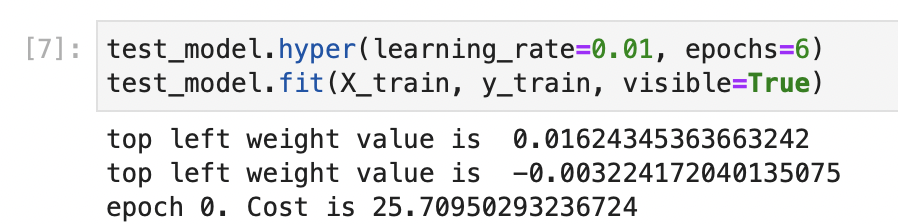